In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


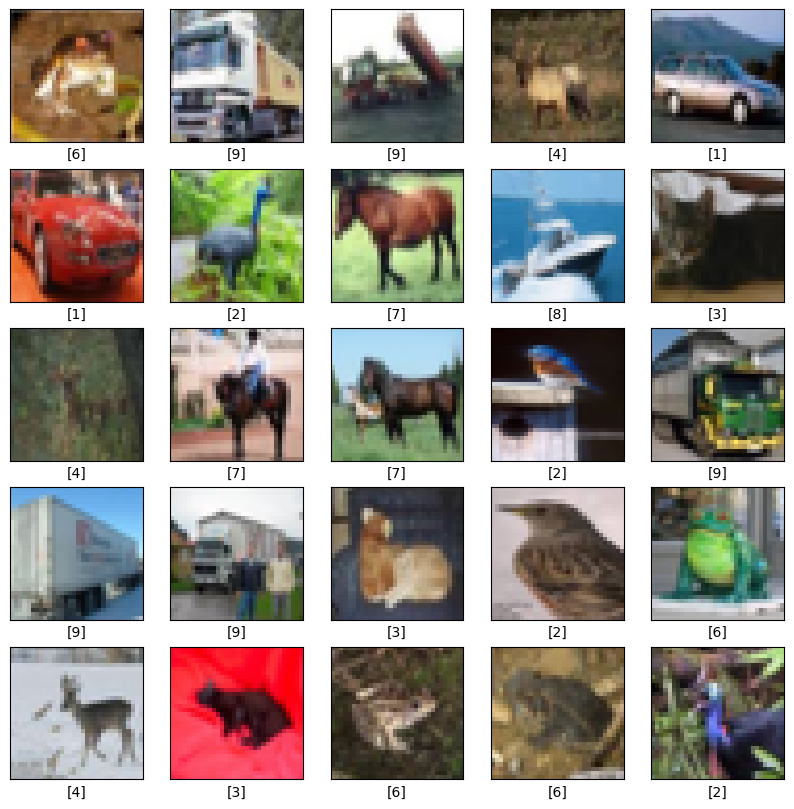

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]), plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()


In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)


In [14]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=1, validation_data=(test_images, test_labels))


782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 123ms/step - accuracy: 0.4237 - loss: 1.5791 - val_accuracy: 0.5212 - val_loss: 1.3141


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 3s - 10ms/step - accuracy: 0.5212 - loss: 1.3141
Test accuracy: 0.5212000012397766


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


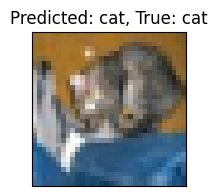

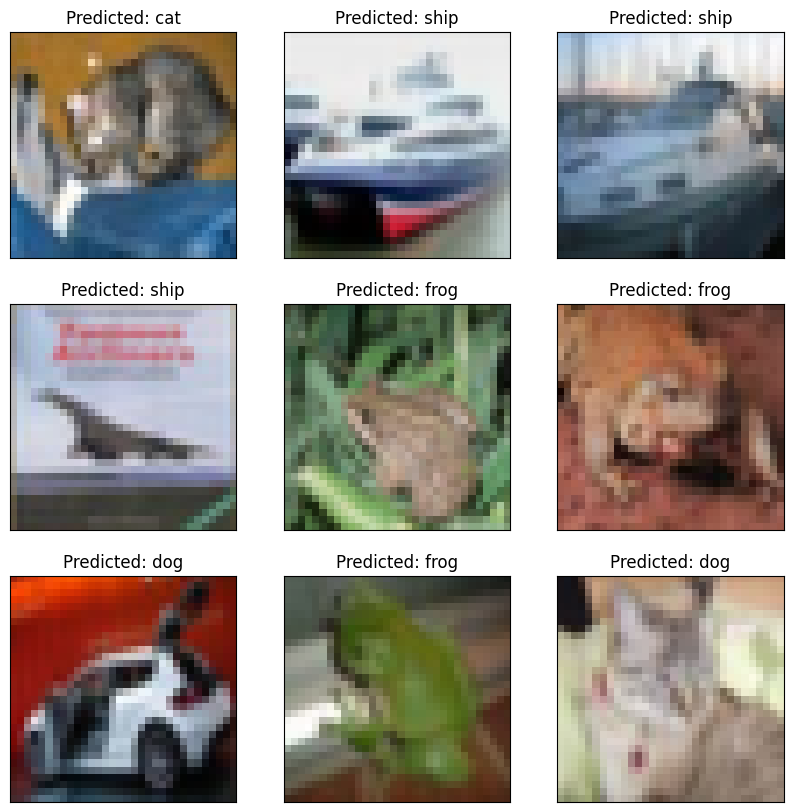

In [18]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Making predictions on the test images
predictions = model.predict(test_images)
predicted_labels = predictions.argmax(axis=1)

# Display an example image, the predicted label, and the true label
import numpy as np
plt.figure(figsize=(2, 2))  # Set the figure size
plt.imshow(test_images[0])   # Display the first test image
plt.title(f"Predicted: {class_names[predicted_labels[0]]}, True: {class_names[test_labels[0][0]]}")
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.show()

# Display multiple images with predictions
plt.figure(figsize=(10, 10))
for i in range(9):  # Display the first 9 test images
    plt.subplot(3, 3, i+1)
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {class_names[predicted_labels[i]]}")
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
plt.show()
